In [16]:
import pandas as pd
import seaborn as s
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans

In [5]:
lr,le,ohe,ss = LinearRegression(),LabelEncoder(),OneHotEncoder(),StandardScaler()

In [6]:
df = pd.read_csv(r"exercise.csv")

In [7]:
for time in df.time:
    if df['time'].dtype == object:
        df['time'] = le.fit_transform(df['time'])
    else:
        pass
df['time'] 

0     0
1     1
2     2
3     0
4     1
5     2
6     0
7     1
8     2
9     0
10    1
11    2
12    0
13    1
14    2
15    0
16    1
17    2
18    0
19    1
20    2
21    0
22    1
23    2
24    0
25    1
26    2
27    0
28    1
29    2
     ..
60    0
61    1
62    2
63    0
64    1
65    2
66    0
67    1
68    2
69    0
70    1
71    2
72    0
73    1
74    2
75    0
76    1
77    2
78    0
79    1
80    2
81    0
82    1
83    2
84    0
85    1
86    2
87    0
88    1
89    2
Name: time, Length: 90, dtype: int64

In [8]:
for kind in df.kind:
    if df['kind'].dtype == object:
        df['kind'] = le.fit_transform(df['kind'])
    else:
        pass
df['kind']

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
     ..
60    1
61    1
62    1
63    1
64    1
65    1
66    1
67    1
68    1
69    1
70    1
71    1
72    1
73    1
74    1
75    1
76    1
77    1
78    1
79    1
80    1
81    1
82    1
83    1
84    1
85    1
86    1
87    1
88    1
89    1
Name: kind, Length: 90, dtype: int64

In [9]:
for diet in df.diet:
    if df['diet'].dtype == object:
        df['diet'] = le.fit_transform(df['diet'])
    else:
        pass
df['diet']

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    1
25    1
26    1
27    1
28    1
29    1
     ..
60    0
61    0
62    0
63    0
64    0
65    0
66    0
67    0
68    0
69    0
70    0
71    0
72    0
73    0
74    0
75    1
76    1
77    1
78    1
79    1
80    1
81    1
82    1
83    1
84    1
85    1
86    1
87    1
88    1
89    1
Name: diet, Length: 90, dtype: int64

In [10]:
x=df[["time","pulse","kind"]].values

In [11]:
y=df['diet']

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.5,random_state=10)

In [13]:
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)

C:\Users\SHIKHAR RAJPUT\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [17]:
lis  = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init="k-means++",random_state=5)
    kmeans.fit(x)
    lis.append(kmeans.inertia_)
lis

[19768.9,
 5467.326923076924,
 2668.049655735792,
 1714.6750641025642,
 1103.1958974358975,
 750.5611443811241,
 565.2425438596491,
 472.334710910005,
 398.4262982115923,
 317.0296799691536]

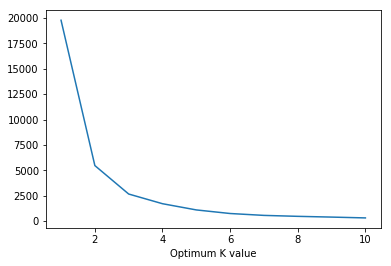

In [18]:
plt.xlabel("Optimum K value")
plt.plot(range(1,11),lis)
plt.show()

In [19]:
kmeans = KMeans(n_clusters=3,init="k-means++",random_state=5)
pred = kmeans.fit_predict(x)

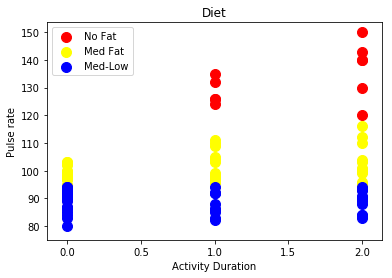

In [28]:
plt.scatter(x[pred == 1,0],x[pred == 1,1], s= 100, c = "red",label = "No Fat")
plt.scatter(x[pred == 0,0],x[pred == 0,1], s= 100, c = "yellow",label = "Med Fat")
plt.scatter(x[pred == 2,0],x[pred == 2,1], s= 100, c = "blue",label = "Med-Low")
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s = 200,c = "cyan",label = "Centroids")
plt.title("Diet")
plt.xlabel("Activity Duration")
plt.ylabel("Pulse rate")
plt.legend()
plt.show()